# Load TF, TFIDF and data

In [2]:
from utils import load_data
from joblib import load

n_topics = [10, 20, 27, 30]
n_docs = 10000
n_top_words = 10
textPre_FilePath = "../data/abstract_corpus.txt"
tf_ModelPath = "../abstract_model/tf.pt"
tfidf_ModelPath = "../abstract_model/tfidf.pt"
lda_ModelPath = "../abstract_model/"

docLst = load_data(textPre_FilePath)[:n_docs]
tfidf_vectorizer = load(tfidf_ModelPath)
tf_vectorizer = load(tf_ModelPath)
tf = tf_vectorizer.transform(docLst)
tfidf = tfidf_vectorizer.transform(tf)

# Load LDA model and print the top words of each topic

In [3]:
from utils import print_top_words
from joblib import load
n_t = 0
lda = load(lda_ModelPath + "lda_" + str(n_topics[n_t]) + ".pt")
print("Perplexity:", lda.perplexity(tfidf))
print("Score:", lda.score(tfidf))
tf_feature_names = tf_vectorizer.get_feature_names_out()
topic_word = print_top_words(lda, tf_feature_names, n_top_words)

Perplexity: 209.6723777320122
Score: -155542.36556748717
Topic #0:
attent transform sequenc memori modul time featur imag architectur inform
Topic #1:
domain target sourc transfer imag featur knowledg gener strategi code
Topic #2:
attack distribut sampl exampl train test gener class accuraci imag
Topic #3:
algorithm problem optim polici function estim gradient time paramet solut
Topic #4:
imag label class classif loss qualiti gener train featur learn
Topic #5:
video layer architectur recognit featur accuraci classif imag paramet comput
Topic #6:
segment detect imag object point featur map resolut instanc github
Topic #7:
graph represent predict structur knowledg inform problem featur framework world
Topic #8:
languag word text pre gener represent train level evalu inform
Topic #9:
question research machin evalu analysi studi applic learn benchmark challeng


# Visualization

In [22]:
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()
pic = pyLDAvis.lda_model.prepare(lda, tfidf, tf_vectorizer)
pyLDAvis.save_html(pic, 'lda_abstract_pass'+str(n_topics[n_t]) + '.html')
pyLDAvis.display(pic)

# Predict topic for each sample

In [4]:
import pandas as pd
import numpy as np


rows = []
for idx, doc in enumerate(tfidf):
    distribution = lda.transform(doc)
    topic_id = np.argmax(distribution)
    data = [docLst[idx], distribution, topic_id]
    rows.append(data)

doc_topic = pd.DataFrame(rows, columns=['doc', 'distribution', 'topic'])
doc_topic

,doc,distribution,topic
0,mnist dataset commonli dataset machin comput v...,"[[0.010614224795104883, 0.010614224791514642, ...",9
1,problem classif group covari matric discrimin ...,"[[0.012740079688382266, 0.012740079688070468, ...",3
2,recurr network model pattern data time network...,"[[0.8762629206334095, 0.013748564371074093, 0....",0
3,task news detect blog text task support expert...,"[[0.015755425017900577, 0.01575542501981665, 0...",8
4,approach dimension reduct dr research task per...,"[[0.01098032485778011, 0.01098032483428691, 0....",3
...,...,...,...
9995,imageri plethora applic weather forecast land ...,"[[0.01159981274586178, 0.011599812749712118, 0...",4
9996,reformul formal result juhani karhum aki inter...,"[[0.022751609339072075, 0.022751609341358982, ...",8
9997,supervis method relat extract text label progr...,"[[0.011568131481471126, 0.011568131487106491, ...",4
9998,valu method methodolog reinforc paper propos s...,"[[0.015188363652567637, 0.015188363652791966, ...",3


# Evaluate the LDA model

## Silhouette Coefficient

In [6]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(tfidf, doc_topic['topic'])
# 1 is best
print("The average Silhouette Coefficient is:", silhouette_avg)

The average Silhouette Coefficient is: 0.03250314872610186


## Davies-Bouldin Index

In [8]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(tfidf.toarray(), doc_topic['topic'])

print("The Davies-Bouldin Index is:", db_index)

The Davies-Bouldin Index is: 4.5604311700511015


## Calinski-Harabasz Index

In [10]:
from sklearn.metrics import calinski_harabasz_score
ch_index = calinski_harabasz_score(tfidf.toarray(), doc_topic['topic'])

print("The Calinski-Harabasz Index is:", ch_index)

The Calinski-Harabasz Index is: 125.29597364431116


## Evaluation

In [23]:
def evaluate(X, labels, lda)
    silhouette_avg = silhouette_score(X, labels)
    db_index = davies_bouldin_score(X.toarray(), labels)
    ch_index = calinski_harabasz_score(X.toarray(), labels)
    return [lda, silhouette_avg, db_index, ch_index]
    
performance = []
for n_t in n_topics:
    lda = load(lda_ModelPath + "lda_" + str(n_topics[n_t]) + ".pt")
    rows = []
    for idx, doc in enumerate(tfidf):
        distribution = lda.transform(doc)
        topic_id = np.argmax(distribution)
        data = [docLst[idx], distribution, topic_id]
        rows.append(data)
    doc_topic = pd.DataFrame(rows, columns=['doc', 'distribution', 'topic'])
    performance.append(evaluate(tfidf, doc_topic['topic'], "lda_"+str(n_t)))

performance = pd.DataFrame(performance, columns=['Model', 'Silhouette Coefficient', 'Davies-Bouldin Index', 'Calinski-Harabasz Index'])
performance

,Model,Silhouette Coefficient,Davies-Bouldin Index,Calinski-Harabasz Index
0,lda_10,0.032503,4.560431,125.295974
1,lda_20,0.042975,3.842511,100.855155
2,lda_27,0.055959,3.333544,104.918157
3,lda_30,0.054428,3.226808,97.886297


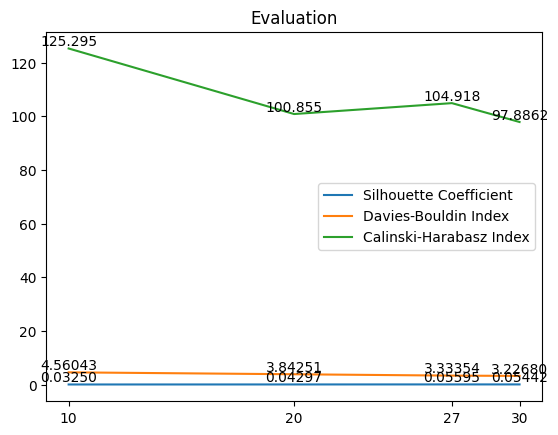

In [22]:
import matplotlib.pyplot as plt
plt.figure()
measures = ['Silhouette Coefficient', 'Davies-Bouldin Index', 'Calinski-Harabasz Index']
for measure in measures:
    plt.plot(n_topics, np.array(performance[measure]), label=measure)
    for i in range(len(n_topics)):
        plt.text(n_topics[i], performance[measure][i], str(performance[measure][i])[:7], ha='center', va='bottom')
plt.xticks(n_topics) 
plt.title('Evaluation')
plt.legend()
plt.show()